In [1]:
import numpy as np
import pylab as pl
import json
import os
import urllib2
from scipy.optimize import curve_fit, minimize
%pylab inline

from __future__ import print_function
__author__='djc'

url = urllib2.urlopen("https://raw.githubusercontent.com/fedhere/PUI2015_fbianco/master/fbb_matplotlibrc.json")
s = json.load(url)
pl.rcParams.update(s)


Populating the interactive namespace from numpy and matplotlib


/Users/Daynan/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#distributions = ['gaus', 'pois','binom','chisq','lap','wald']
mymean = 50
distributions = {}
means = {}

[1860  199  657  132  558  895 1884  427  570 1930 1026  279  932  811 1960
  571 1670 1451 1685 1483  847 1976 1964 1178 1255  384 1362 1401  810 1432
 1733 1716 1656  967 1481 1290  767 1176  500  865  921  300 1574  591  358
  746  855 1673 1488  900 1758  203   27 1695 1420 1045  318 1519 1616  397
  712  610  518  990   90  492 1895  409 1953  933 1249  431 1565 1393  514
  806 1599 1014 1307 1769 1787 1592  587  497 1622 1122 1657  632 1102  951
  880  348  569 1484  688 1652 1062 1010  552  216]


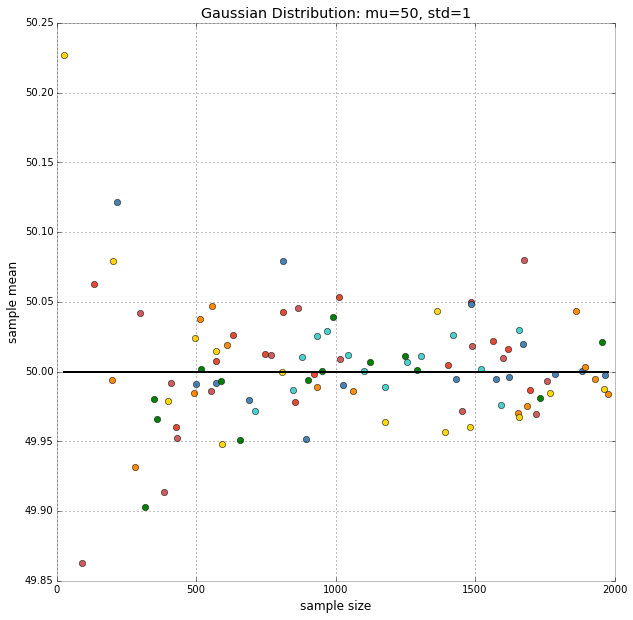

In [3]:
#create gaussian distribution
distributions['gaus'] = {}
gaus_size = ((np.random.rand(100)*1989)+10).astype(int)
#for reproducibility, we print the randomly-generated set of sample sizes
print (gaus_size)
# We'll set the standard deviation arbitrarily.
gaus_std = 1
for n in gaus_size:
    #setting std to 1
    distributions['gaus'][n]=np.random.normal(mymean,gaus_std,size=n)

means['gaus'] = {}
    
#plot gaussian distribution
fig_gaus_mu_N = pl.figure(figsize=(10,10))
axgaus = fig_gaus_mu_N.add_subplot(111)
for nn in distributions['gaus']:
    means['gaus'][nn] = distributions['gaus'][nn].mean()
    axgaus.plot(nn, means['gaus'][nn], 'o')
    axgaus.set_title('Gaussian Distribution: mu={}, std={}'.format(mymean,gaus_std))
    axgaus.set_xlabel('sample size')
    axgaus.set_ylabel('sample mean')
    axgaus.plot([min(gaus_size), max(gaus_size)],[mymean,mymean],'k')

[1368 1657 1140 1436   28 1497  111  961  389 1156  293 1313   81 1682  718
  273  722  734  816 1681 1878 1862 1238  133 1909 1180  278  163  694  387
  148 1798  257  883  308  229 1414 1500 1918 1786 1521 1924 1978  869  855
  371  212 1946  599  149 1571  157  918 1746 1663 1238 1681  903  383 1663
  308  449 1946  764  536 1102   58  576  575  122 1036 1274  662 1516  993
  173 1659  340  976  230  723  388  497  759 1463 1036  531 1679 1000  599
 1890  845  648  550  101  275 1377 1064 1773 1626]


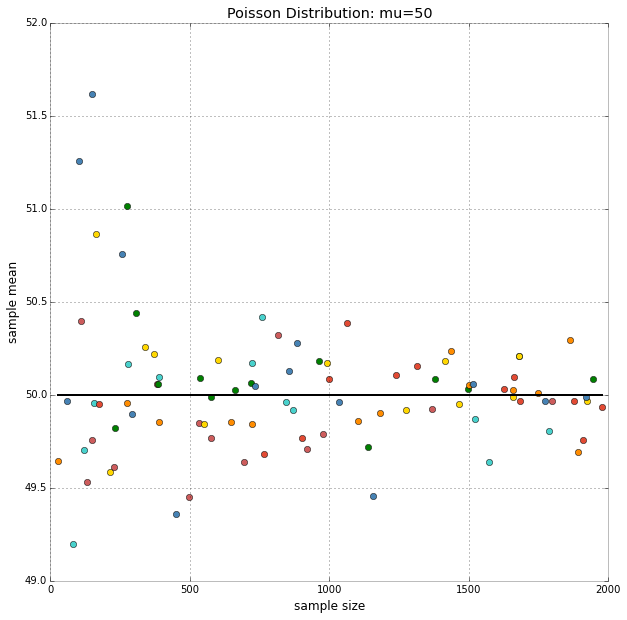

In [4]:
#create poisson distribution
distributions['pois'] = {}
pois_size = ((np.random.rand(100)*1989)+10).astype(int)
#for reproducibility, we print the randomly-generated set of sample sizes
print (pois_size)
for n in pois_size:
    #lamba = mymean
    distributions['pois'][n]=np.random.poisson(mymean,size=n)

means['pois'] = {}
    
#plot poisson distribution
fig_pois_mu_N = pl.figure(figsize=(10,10))
axpois = fig_pois_mu_N.add_subplot(111)
for nn in distributions['pois']:
    means['pois'][nn] = distributions['pois'][nn].mean()
    axpois.plot(nn, means['pois'][nn], 'o')
    axpois.set_title('Poisson Distribution: mu={}'.format(mymean))
    axpois.set_xlabel('sample size')
    axpois.set_ylabel('sample mean')
    axpois.plot([min(pois_size), max(pois_size)],[mymean,mymean],'k')

[ 566  365 1513  338 1362 1899  396  102 1447 1989 1180  270 1720 1649 1019
   97  377  944 1133  239   60 1898  514 1442  233  215  985 1668 1117  702
 1764   87  604 1071  439 1649  920 1361 1625  289  480 1268 1099 1323 1096
  671 1709  899 1213 1943 1751 1159 1144  142  639  935  625  578 1456 1116
 1743 1970 1176  357 1574  898  872  497  211  252  790   42 1602  648 1263
 1092   96  461  641  117 1195 1806 1776   94 1237 1124 1665  451 1483  694
  689 1445 1449  618  669 1581  895 1189 1117 1404]


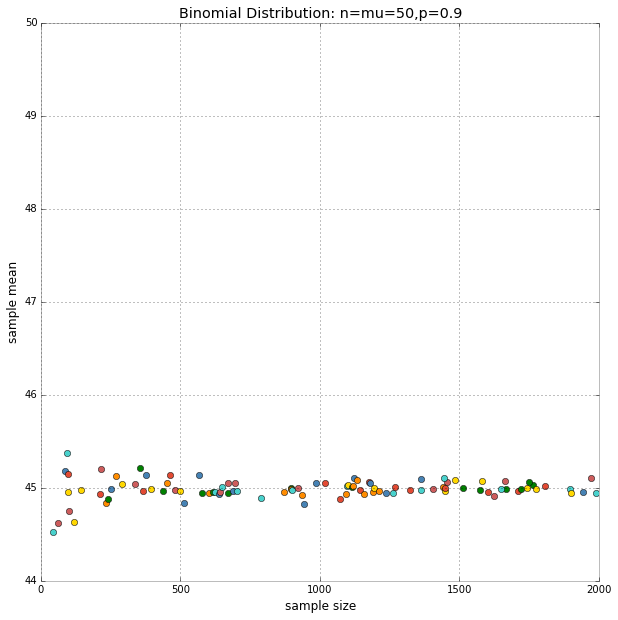

In [5]:
#create binomial distribution
distributions['binom'] = {}
binom_size = ((np.random.rand(100)*1989)+10).astype(int)
#for reproducibility, we print the randomly-generated set of sample sizes
print (binom_size)
# binomial disributions describe dichotomous outcomes (i.e. pass/fail) 
# for a given number of trials. 
# To simulate such an outcome I'm giving a probability of success an arbitrary value
p=.90
for n in binom_size:
    distributions['binom'][n]=np.random.binomial(mymean,p,size=n)

means['binom'] = {}

#plot binomial distribution
fig_binom_mu_N = pl.figure(figsize=(10,10))
axbinom = fig_binom_mu_N.add_subplot(111)
for nn in distributions['binom']:
    means['binom'][nn] = distributions['binom'][nn].mean()
    axbinom.plot(nn, means['binom'][nn], 'o')
    axbinom.set_title('Binomial Distribution: n=mu={},p={}'.format(mymean,p))
    axbinom.set_xlabel('sample size')
    axbinom.set_ylabel('sample mean')
    axbinom.plot([min(binom_size), max(binom_size)],[mymean,mymean],'k')

[1326 1566  494  701 1762  824  258 1393  185 1011  453 1651  867  477  347
  399  853 1522 1994 1175 1777 1467  924 1129 1859 1816 1309 1934 1810  461
 1185  551 1395 1112  439  549  925  752 1321 1682 1659 1026  821  193  760
 1028 1634  621  295 1471 1542  777  679  433  579 1062  324  217 1391  464
 1479  361 1969 1068 1388  617 1465 1288 1105  594  946 1893  822  872 1598
 1934 1598 1313 1324   37 1875 1475  171  505  507  825  593 1975  485 1519
 1001  752  611 1089   56 1389 1871  669  134  986]


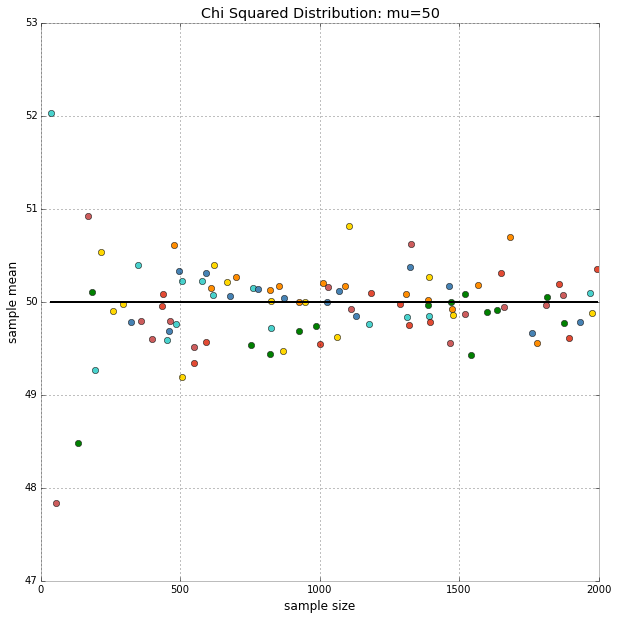

In [5]:
#create chi^2 distribution
distributions['chisq'] = {}

chisq_size = ((np.random.rand(100)*1989)+10).astype(int)
#for reproducibility, we print the randomly-generated set of sample sizes
print (chisq_size)
# df is equal to mean
df = mymean
for n in chisq_size:
    distributions['chisq'][n]=np.random.chisquare(mymean,size=n)

means['chisq'] = {}

#plot chi^2 distribution
fig_chisq_mu_N = pl.figure(figsize=(10,10))
axchisq = fig_chisq_mu_N.add_subplot(111)
for nn in distributions['chisq']:
    means['chisq'][nn] = distributions['chisq'][nn].mean()
    axchisq.plot(nn, means['chisq'][nn], 'o')
    axchisq.set_title('Chi Squared Distribution: mu={}'.format(mymean))
    axchisq.set_xlabel('sample size')
    axchisq.set_ylabel('sample mean')
    axchisq.plot([min(chisq_size), max(chisq_size)],[df,df],'k')

[1526  728  190  471  585  263 1551 1874 1877   52  711 1031 1161  840  241
  170 1652  632 1977 1857  417  579 1450 1680  350 1656 1209 1783 1159 1696
  217 1951  863 1730  967  792 1635 1982  950 1169 1373  638 1742  162 1998
  474 1409 1211 1212  228 1123  397  467  375 1452 1837  566  850 1003  810
 1460 1454 1753  984   72   39 1481  334  183  469 1085  713 1655 1043 1876
  609  629 1769 1752  429  141 1203  976 1966  850 1747 1113   88  688  304
 1181  660  758  429  602 1761 1770 1433   45  947]


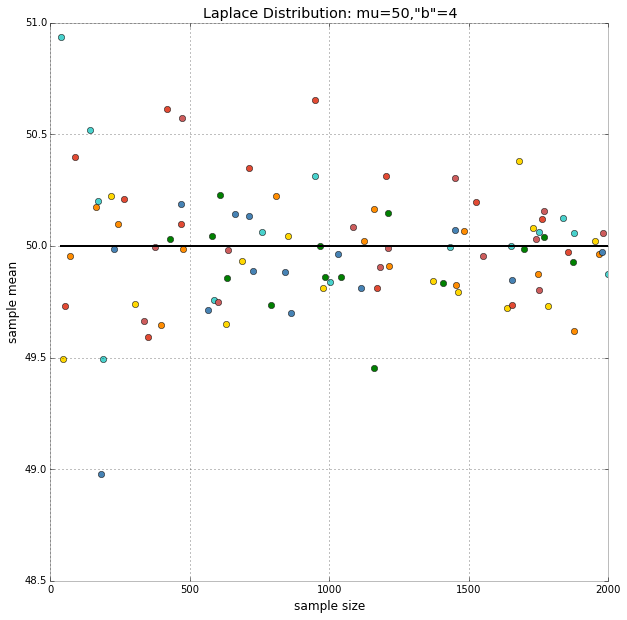

In [6]:
#create laplace distribution
distributions['lap'] = {}

lap_size = ((np.random.rand(100)*1989)+10).astype(int)
#for reproducibility, we print the randomly-generated set of sample sizes

print (lap_size)
# the "float" or "b" scale parameter should be >0 (real). We'll set it arbitrarily:
b = 4

for n in lap_size:
    distributions['lap'][n]=np.random.laplace(mymean,b,size=n)

means['lap'] = {}

#plot laplace distribution
fig_lap_mu_N = pl.figure(figsize=(10,10))
axlap = fig_lap_mu_N.add_subplot(111)
for nn in distributions['lap']:
    means['lap'][nn] = distributions['lap'][nn].mean()
    axlap.plot(nn, means['lap'][nn], 'o')
    axlap.set_title('Laplace Distribution: mu={},"b"={}'.format(mymean,b))
    axlap.set_xlabel('sample size')
    axlap.set_ylabel('sample mean')
    axlap.plot([min(lap_size), max(lap_size)],[mymean,mymean],'k')

[1451  457  604  974 1600 1051 1468   51 1317  978  503 1460  824 1538  253
 1159  976  383  532   87   50 1671 1059   26 1752   41 1455 1517  721  381
  623  591  219 1267  394 1052 1835  226  457 1888  457 1629 1659  545  905
 1577 1719  578  778 1210  944 1791 1427 1392  753 1285 1708  954  365  306
  828 1866  804 1332  907  112 1305 1945  333 1157 1210 1134   43 1392 1098
  113 1179  946  191  947  441  275  142 1351 1061  323  413 1103 1045 1208
  283 1483 1196 1368 1172 1944  943  294  631  617]


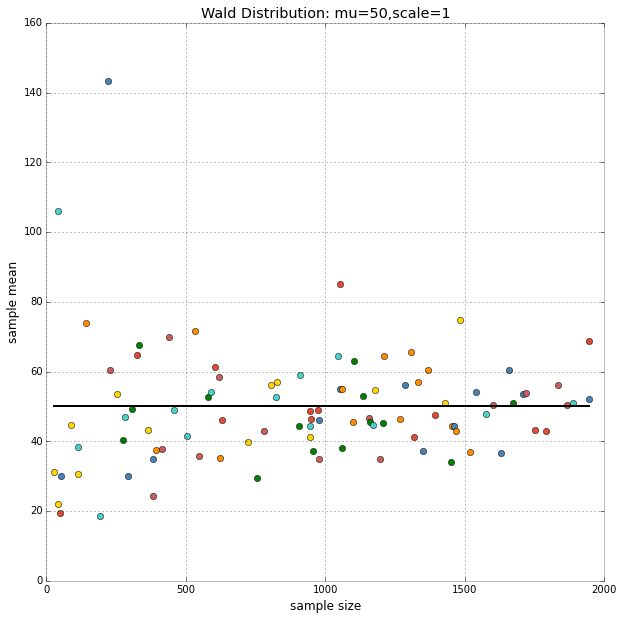

In [7]:
#create Wald, or "inverse Gaussian" distribution
distributions['wald'] = {}

wald_size = ((np.random.rand(100)*1989)+10).astype(int)
#for reproducibility, we print the randomly-generated set of sample sizes
print (wald_size)
# the scale parameter should be >=0 (real). We'll set it arbitrarily:
wald_scale = 1

for n in wald_size:
    distributions['wald'][n]=np.random.wald(mymean,wald_scale,size=n)

means['wald'] = {}

#plot wald distribution
fig_wald_mu_N = pl.figure(figsize=(10,10))
axwald = fig_wald_mu_N.add_subplot(111)
for nn in distributions['wald']:
    means['wald'][nn] = distributions['wald'][nn].mean()
    axwald.plot(nn, means['wald'][nn], 'o')
    axwald.set_title('Wald Distribution: mu={},scale={}'.format(mymean,wald_scale))
    axwald.set_xlabel('sample size')
    axwald.set_ylabel('sample mean')
    axwald.plot([min(wald_size), max(wald_size)],[mymean,mymean],'k')

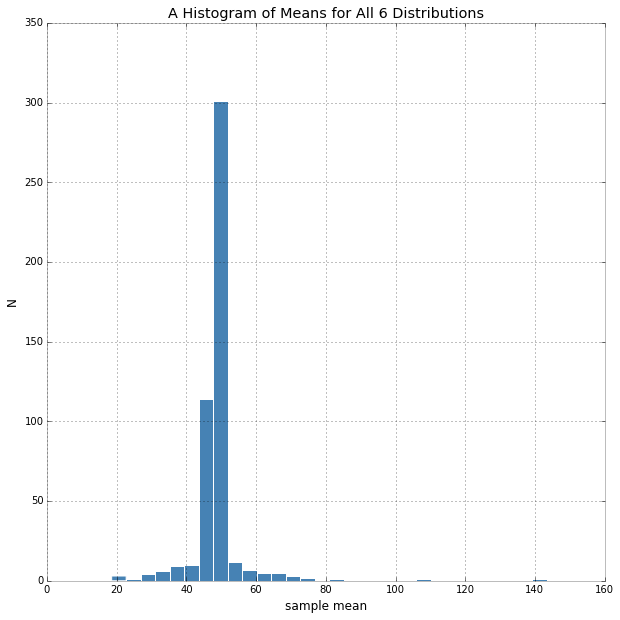

In [26]:
allmeans=[]
for n in distributions:
    for nn in means[n]:
        allmeans.append(means[n][nn])

fig_allmeans = pl.figure(figsize=(10,10))
axmeans = fig_allmeans.add_subplot(111)
axmeans.hist(allmeans,bins=30)
axmeans.set_title("A Histogram of Means for All 6 Distributions")
pl.xlabel('sample mean')
pl.ylabel('N')